In [1]:
import pathlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

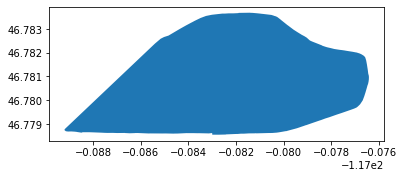

In [2]:
boundaryPath = pathlib.Path.cwd() / "input" / "cookeast_boundary_20190924.geojson"
ce_boundary = gpd.read_file(boundaryPath)
ce_boundary.crs = {"init": "epsg:4326"}
ce_boundary.plot()

In [18]:
inPath = pathlib.Path.cwd() / "working" / "cleaned_data_20200709_P2A1.csv"
df = pd.read_csv(inPath)
gdf = gpd.GeoDataFrame(
    df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
).drop(["Latitude", "Longitude"], axis = 1)
gdf.crs = {"init": "epsg:4326"}

gdf

,ID2,Elevation,Slope,Aspect,TopographicWetnessIndex,RelativeSlopePosition,AnnualGlobalSolarRadiation,DepthFewRoots,DepthNoRoots,RelativeYieldCV,RelativeYieldMean,HasSoilDescription,geometry
0,1,781.48643,7.600873,195.363983,5.702310,0.070712,1860.944336,NaN,NaN,0.293239,0.812913,0,POINT (-117.08751 46.77873)
1,2,782.43932,5.939017,198.724243,6.433780,0.079845,1833.973389,NaN,NaN,0.220757,0.762287,0,POINT (-117.08706 46.77869)
2,3,784.93625,8.471982,198.494370,5.602043,0.139886,1871.270264,98.0,153.0,0.172133,0.926175,1,POINT (-117.08668 46.77879)
3,4,786.42902,8.178418,188.564774,5.865278,0.176579,1873.524658,NaN,NaN,0.116239,0.965077,0,POINT (-117.08626 46.77876)
4,5,786.51237,7.400980,201.473892,5.538609,0.173804,1853.676514,97.0,97.0,0.145872,1.051545,1,POINT (-117.08584 46.77867)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,421,783.95631,4.995042,351.782104,8.074759,0.100640,1634.758179,NaN,NaN,0.307517,0.908274,1,POINT (-117.08237 46.78355)
365,422,784.81321,5.245150,9.708474,6.867740,0.127012,1629.647461,NaN,NaN,0.287672,0.915861,0,POINT (-117.08193 46.78343)
366,423,784.29571,2.963377,347.754272,8.597717,0.111718,1677.736816,NaN,NaN,0.246517,1.120300,1,POINT (-117.08148 46.78355)
367,424,784.61569,2.384538,338.599609,9.079645,0.121904,1691.423706,NaN,NaN,0.389555,1.226840,0,POINT (-117.08110 46.78357)


In [ ]:
TWI_cutoff = gdf["TopographicWetnessIndex"].quantile(0.5)
AGSR_cutoff = gdf["AnnualGlobalSolarRadiation"].quantile(0.5)
RYCV_25percentile = gdf["RelativeYieldCV"].quantile(0.25)
RYCV_75percentile = gdf["RelativeYieldCV"].quantile(0.75)
Slope_cutoff = gdf["Slope"].quantile(0.5)

gdf_profile = gdf[gdf["HasSoilDescription"] > 0]

gdf_TWI = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff)]
gdf_AGSR = gdf_profile[(gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff)]
gdf_RYCV = gdf_profile[(gdf_profile["RelativeYieldCV"] < RYCV_75percentile) & (gdf_profile["RelativeYieldCV"] > RYCV_25percentile)]
gdf_slope = gdf_profile[(gdf_profile["Slope"] < Slope_cutoff)]

gdf_TWI_AGSR = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff) & (gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff)]
gdf_TWI_AGSR_RYCV = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff) & (gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff) & (gdf_profile["RelativeYieldCV"] < RYCV_75percentile) & (gdf_profile["RelativeYieldCV"] > RYCV_25percentile)]

gdf_TWI_Slope_RYCV = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff) & (gdf_profile["Slope"] < Slope_cutoff) & (gdf_profile["RelativeYieldCV"] < RYCV_75percentile) & (gdf_profile["RelativeYieldCV"] > RYCV_25percentile)]

#gdf_filtered = gdf[gdf["RelativeSlopePosition"] > .35]
print("gdf_TWI: " + str(len(gdf_TWI)))
print("gdf_AGSR: " + str(len(gdf_AGSR)))
print("gdf_TWI_AGSR: " + str(len(gdf_TWI_AGSR)))
print("gdf_RYCV: " + str(len(gdf_RYCV)))
print("gdf_TWI_AGSR_RYCV: " + str(len(gdf_TWI_AGSR_RYCV)))
print("gdf_slope: " + str(len(gdf_slope)))
print("gdf_TWI_Slope_RYCV: " + str(len(gdf_TWI_Slope_RYCV)))

In [ ]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI_Slope_RYCV.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI_AGSR.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_AGSR.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_RYCV.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI_AGSR_RYCV.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

In [ ]:
gdf.describe()


In [ ]:
gdf_TWI_AGSR_RYCV.describe()

In [ ]:
gdf_TWI_Slope_RYCV.describe()

In [ ]:
# Bryan's stab at filtering based on TWI, AGSR, RYCV
foo = gdf_TWI_AGSR_RYCV.copy()
foo["Latitude"] = foo["geometry"].y
foo["Longitude"] = foo["geometry"].x
foo.drop(columns=["geometry"]).to_csv("output\LtarModelingDssatForCroplands_ChooseGeorefPointsForModeling_Quick1.csv", index=False)

In [ ]:
# Bryan's stab at filtering based on TWI, Slope, and RYCV
foo = gdf_TWI_Slope_RYCV
foo["Latitude"] = foo["geometry"].y
foo["Longitude"] = foo["geometry"].x
foo.drop(columns=["geometry"]).to_csv("output\LtarModelingDssatForCroplands_ChooseGeorefPointsForModeling_Quick2_TWI_Slope_RYCV.csv", index=False)

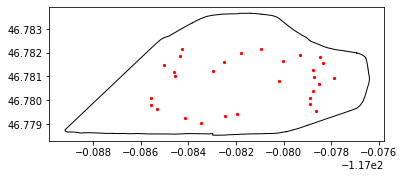

In [25]:
# Dave reviewed gdf_TWI_Slope_RYCV and: "Hi Bryan: the following are the points I recommend-I deleted some points from your list where I think the field conditions or operations would mess up values. I also added points to include a transect that crosses from S to N and has varying degree of slope/soil influence—I thought this might be useful to see how well model is doing under different conditions."

df = pd.read_csv(inPath)
locations_from_dave = [31,53,57,75,83,91,101,117,127,143,169,191,195,205,219,221,229,233,243,251,257,263,267,275,287,289,300,306,308]
df_out = df[df["ID2"].isin(locations_from_dave)]
df_out.to_csv("output\LtarModelingDssatForCropLands_ChooseGeorefPointsForModeling_DavesSelection_20200716.csv", index=False)

# Quick plot
quick_out = gdf[gdf["ID2"].isin(locations_from_dave)]
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
quick_out.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()